# Ideas & Stuff that needs to be done:
- Good data splits
- Feature Importance
- Comparison of uncomplicated vs. complicated
- Do result visualization (e.g. ROC/AUC)
- Feature Selection comparison
- Include recommendations based on predictions

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [111]:
features = pd.read_csv('all_uti_features.csv', index_col = 'example_id')
prescrip = pd.read_csv('all_prescriptions.csv', index_col = 'example_id')
resistance = pd.read_csv('all_uti_resist_labels.csv', index_col = 'example_id')

### For us, resistance to SXT and CIP is the target variable to predict!

In [183]:
cip_df = resistance[['SXT']].join(features)

## Divide into train & test data

- Don't touch the test data afterwards!
- Avoid having the same person in train & test data -> data leakage 

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('selected micro - ', regex=True, na=True)], axis = 1)

In [186]:
cip_y = cip_df[['SXT']]
cip_X = cip_df.drop('SXT', axis = 1)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(cip_X, cip_y, train_size = 0.7)

In [226]:
X_train['SXT'] = y_train['SXT']
X_test['SXT'] = y_test['SXT']

C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [227]:
X_train.dropna(inplace = True)
X_test.dropna(inplace = True)

C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\benne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [228]:
y_train = X_train['SXT']
X_train = X_train.drop('SXT', axis = 1)
y_test = X_test['SXT']
X_test = X_test.drop('SXT', axis = 1)

## Feature Reduction

#### Eliminate sparse binary features

In [229]:
for feature in X_train.columns:
    if X_train[feature].unique().shape[0] == 2: # Check if variable is binary
        if (X_train[feature].sum() / X_train.shape[0]) <= 0.001: # Check if positive patients are sparse
            print(X_train[[feature]].sum())
            X_train.drop(feature, axis = 1, inplace = True)
            X_test.drop(feature, axis = 1, inplace = True)

micro - prev resistance SAM 14    59.0
dtype: float64
micro - prev resistance STRS 30    69.0
dtype: float64
micro - prev resistance CTT 90    47.0
dtype: float64
ab class 7 - ansamycin    21.0
dtype: float64
medication 7 - ceftazidime    21.0
dtype: float64
medication 7 - cefpodoxime    65.0
dtype: float64
medication 7 - tetracycline    12.0
dtype: float64
medication 7 - dicloxacillin    31.0
dtype: float64
medication 7 - cefuroxime    18.0
dtype: float64
medication 7 - minocycline    15.0
dtype: float64
medication 7 - rifampin    21.0
dtype: float64
medication 7 - clarithromycin    29.0
dtype: float64
medication 7 - nafcillin    47.0
dtype: float64
medication 7 - erythromycin    61.0
dtype: float64
medication 7 - cefadroxil    11.0
dtype: float64
ab class 14 - fosfomycin    70.0
dtype: float64
ab class 14 - ansamycin    45.0
dtype: float64
medication 14 - tetracycline    20.0
dtype: float64
medication 14 - dicloxacillin    55.0
dtype: float64
medication 14 - clarithromycin    52.0
dt

In [230]:
X_train.columns

Index(['demographics - age', 'demographics - is_white',
       'demographics - is_veteran', 'micro - prev resistance LVX 14',
       'micro - prev resistance AMP 14', 'micro - prev resistance CFZ 14',
       'micro - prev resistance NIT 14', 'micro - prev resistance GEN 14',
       'micro - prev resistance SXT 14', 'micro - prev resistance TET 14',
       ...
       'infection_sites - RESPIRATORY_TRACT', 'infection_sites - BLOOD',
       'infection_sites - SKIN_SOFTTISSUE',
       'infection_sites - ABSCESS_OR_FLUID_NOS', 'hosp ward - ER',
       'hosp ward - ICU', 'hosp ward - IP', 'hosp ward - OP', 'is_train',
       'uncomplicated'],
      dtype='object', length=678)

## Feature Selection

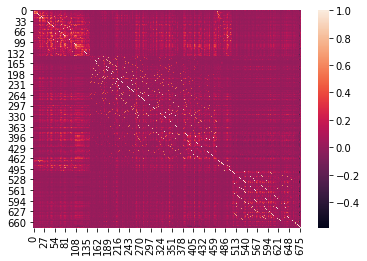

In [231]:
sns.heatmap(np.corrcoef(X_train.join(y_train), rowvar = False))

In [232]:
np.corrcoef(X_train.join(y_train), rowvar = False)[X_train.shape[1]]

array([-9.02481997e-03, -8.87923638e-02,  8.76627102e-03,  3.73675277e-02,
        3.47094367e-02,  2.33418106e-02,  2.22113854e-02,  2.71669181e-02,
        5.42938468e-02,  3.83593257e-02,  2.62306884e-02,  3.47013716e-02,
        5.14855492e-02,  3.44990548e-02,  2.96395171e-02,  2.59943781e-02,
        1.08825223e-01,  8.25556196e-02,  3.66587100e-02,  1.05750678e-01,
        2.81849971e-02,  1.91859711e-02,  6.38981716e-02,  1.11537785e-01,
        1.08172901e-01,  8.63157057e-02,  8.78570763e-02,  1.70924346e-01,
        7.33469388e-02,  6.62547904e-02,  4.01500698e-02,  5.21435471e-02,
        5.30345684e-02,  7.00576226e-02,  2.56961035e-02,  2.23818827e-02,
        1.07936804e-01,  1.56283227e-01,  9.36868632e-02,  5.83417472e-02,
        1.59805626e-01,  1.24337741e-01,  2.57626424e-02,  6.13735895e-02,
        2.54563213e-01,  1.61640875e-01,  1.07146809e-01,  1.58291662e-01,
        8.92217511e-02,  5.15423103e-02,  6.00221222e-02,  7.74231001e-02,
        2.56546235e-02,  

In [233]:
from sklearn.decomposition import PCA

In [234]:
reduced = PCA(n_components = 0.9).fit_transform(X = cip_df.drop('CIP', axis = 1))

KeyError: "['CIP'] not found in axis"

In [ ]:
pd.DataFrame(reduced, index = cip_df.index)

## Construct "Blackbox" Models

Models to test & tune: 
- XGBoost
- Neural Net
- Random Forest
- Ensembles of all of them

In [235]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [236]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [237]:
xgb_mod = xgb.XGBClassifier(objective = 'binary:logistic')

In [238]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search_first = RandomizedSearchCV(xgb_mod, param_distributions=params, scoring = 'roc_auc', random_state=42, n_iter=5, cv=3, verbose=1, n_jobs=7, return_train_score=True)

search_first.fit(X_train, y_train)

report_best_scores(search_first.cv_results_, 1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  15 out of  15 | elapsed:  6.2min finished
C:\Users\benne\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model with rank: 1
Mean validation score: 0.706 (std: 0.000)
Parameters: {'colsample_bytree': 0.8835558684167137, 'gamma': 0.06974693032602092, 'learning_rate': 0.11764339456056544, 'max_depth': 5, 'n_estimators': 114, 'subsample': 0.7824279936868144}



In [239]:
search_first.best_score_

0.7056637087588481

In [240]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score

In [241]:
accuracy_score(pd.DataFrame(search_first.predict(X_test)), y_test)

0.7827876760789862

In [242]:
roc_auc_score(search_first.predict(X_test), y_test)

0.7472799481716336

In [243]:
f1_score(search_first.predict(X_test), y_test)

0.37312047521811764

In [244]:
confusion_matrix(search_first.predict(X_test), y_test)

array([[22330,  5908],
       [  846,  2010]], dtype=int64)

In [245]:
from sklearn.linear_model import LogisticRegression


In [246]:
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\benne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [247]:
accuracy_score(lr.predict(X_test), y_test)

0.7789284106258442

In [248]:
roc_auc_score(lr.predict(X_test), y_test)

0.7353923368673707

In [249]:
f1_score(lr.predict(X_test), y_test)

0.36269237900982754

In [250]:
confusion_matrix(lr.predict(X_test), y_test)

array([[22264,  5962],
       [  912,  1956]], dtype=int64)

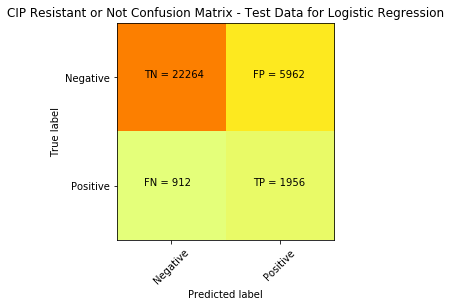

In [251]:
cm = confusion_matrix(lr.predict(X_test), y_test)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('CIP Resistant or Not Confusion Matrix - Test Data for Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j-0.25,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [254]:
accuracy_score(rf.predict(X_test), y_test)

0.770566668810703

In [255]:
f1_score(rf.predict(X_test), y_test)

0.36383092562867847

In [256]:
confusion_matrix(rf.predict(X_test), y_test)

array([[21920,  5878],
       [ 1256,  2040]], dtype=int64)